<a href="https://colab.research.google.com/github/lirnara/Trash/blob/Anfisa-tried-to-make-smth/pretrained_VGG16_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Final_dataset.zip to Final_dataset.zip


In [3]:
import zipfile
import os

# Get the name of the uploaded  file
#file_name = list(uploaded.keys())[0]

file_name = '/content/Final_dataset.zip'

# Specify the extraction path
extract_path = '/content/input_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the DATASET.zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the extraction was successful
if os.path.exists(extract_path):
    print(f"Extraction successful. Dataset is located at: {extract_path}")
else:
    print("Extraction failed. Please check the zip file path and try again.")

Extraction successful. Dataset is located at: /content/input_data


In [11]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/input_data/Final_dataset/extracted_data'):
        print(dirname)

/content/input_data/Final_dataset/extracted_data
/content/input_data/Final_dataset/extracted_data/TRAIN
/content/input_data/Final_dataset/extracted_data/TRAIN/Other
/content/input_data/Final_dataset/extracted_data/TRAIN/M
/content/input_data/Final_dataset/extracted_data/TEST
/content/input_data/Final_dataset/extracted_data/TEST/Other
/content/input_data/Final_dataset/extracted_data/TEST/M


In [5]:
test_data_dir = '/content/input_data/Final_dataset/extracted_data/TEST'

In [6]:
# Load VGG16 Pretrained Model
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 3s 0us/step


In [7]:
# Define Function for Image Prediction
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score:.2f})")

In [9]:
# Function to load and display images
def load_and_display_images(class_folder, image_files):
    plt.figure(figsize=(15, 5))

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_folder, img_file)
        img = image.load_img(img_path, target_size=(224, 224))

        # Plot image
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f'Image: {img_file}', fontdict={'size': 12, 'weight': 'bold'})
        plt.axis('off')

        # Predict and print categories
        print(f"\nImage: {img_file}")
        predict_image(img_path)

    plt.show()



Class: Other

Image: paper_173.jpg
1/1 [==============================] - 1s 993ms/step
Predictions:
1: nail (0.09)
2: can_opener (0.09)
3: pencil_sharpener (0.06)

Image: paper_445.jpg
1/1 [==============================] - 1s 1s/step
Predictions:
1: packet (0.63)
2: menu (0.08)
3: refrigerator (0.03)

Image: cardboard1.jpg
1/1 [==============================] - 1s 1s/step
Predictions:
1: carton (0.53)
2: envelope (0.13)
3: shower_curtain (0.04)


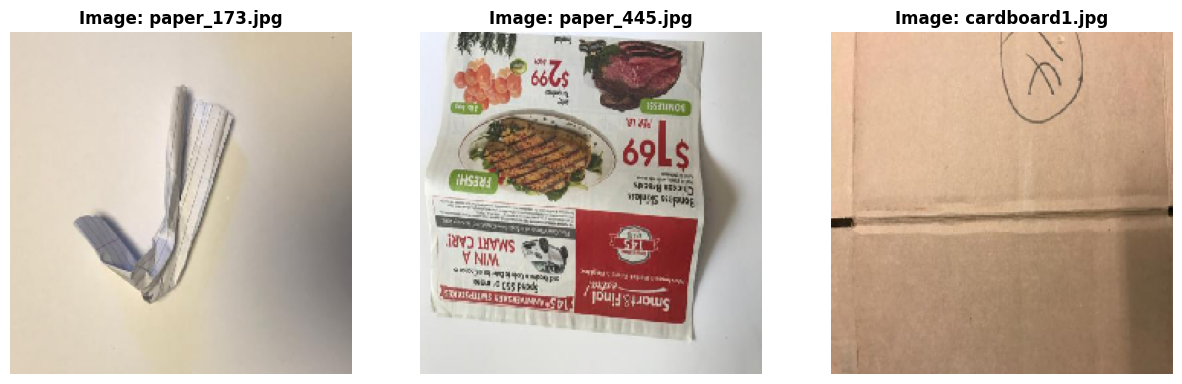


Class: M

Image: igly-v-assortimente50.png
1/1 [==============================] - 1s 1s/step
Predictions:
1: syringe (0.31)
2: screwdriver (0.31)
3: hair_slide (0.12)

Image: zashchitnye-fiksiruyushchie-povyazki1.png
1/1 [==============================] - 1s 964ms/step
Predictions:
1: Band_Aid (0.92)
2: rubber_eraser (0.04)
3: envelope (0.01)

Image: 122_jpg.rf.1e2df56eef044e4e1f4b2d16444f0335.jpg
1/1 [==============================] - 1s 904ms/step
Predictions:
1: syringe (0.60)
2: lipstick (0.06)
3: perfume (0.05)


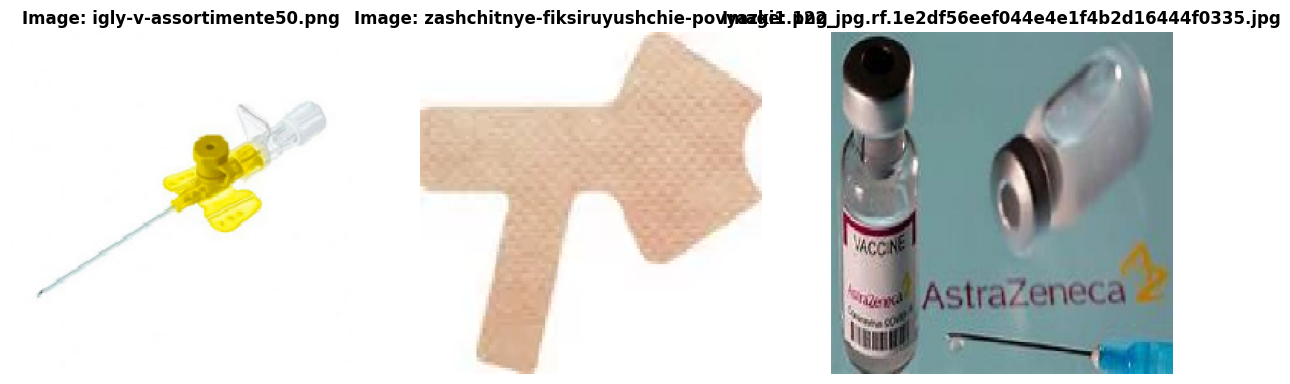

In [12]:
# Predict for Random 3 Images in Each Class
for class_folder in os.listdir(test_data_dir):
    class_path = os.path.join(test_data_dir, class_folder)
    if os.path.isdir(class_path):
        print(f"\nClass: {class_folder}")
        image_files = os.listdir(class_path)
        random_image_files = random.sample(image_files, min(3, len(image_files)))

        # Load and display images, and predict categories for each image
        load_and_display_images(class_path, random_image_files)